<a href="https://colab.research.google.com/github/BOTnreLI/LinearRegressor_withsklearn/blob/main/674Finalproject_regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR



Defining Libraries for usages

In [282]:
def replacement(X):
  if(X == 7 or X == 1):
    return 1
  else: 
    return 0

def replace_2(X1, X2):
  if(X2 =='AM'):
    return X1
  elif(X2 == 'PM'):
    return X1+12
  else:
    return 0


def compute_evaluations(model, X, y_true, name):
    y_pred = model.predict(X)
    mse_value = mean_squared_error(y_true, y_pred)

    mape_value = mean_absolute_percentage_error(y_true, y_pred)

    rmse_value = mean_squared_error(y_true, y_pred, squared=False)

    print(f'Mean Squared Error for {name}: {mse_value}')
    print()
    print(f'Mean Absolute percentage error for {name}: {mape_value}')
    print()
    print(f'Root Mean Squared Error for {name}: {rmse_value}')
    print()

def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(model):
        print()
        compute_evaluations(model, X_train, y_train, 'training set')
        print('*****')
        compute_evaluations(model, X_test, y_test, 'test set')
    
    return evaluate

 
def timeSection_8(x):
    if(x == 2 or x == 3 or x == 4 or x == 5 or x == 6 or x == 7 or x == 8 or x == 9):
      return 1
    elif(x == 10 or x == 11 or x == 12 or x == 13 or x == 14 or x == 15 or x == 16 or x == 17):
      return 2
    elif(x == 18 or x == 19 or x == 20 or x == 21 or x == 22 or x == 23 or x == 24 or x == 1):
      return 3
    else: return 0

def timeSection_6(x):
    if(x == 2 or x == 3 or x == 4 or x == 5 or x == 6 or x == 7):
      return 1
    elif(x == 8 or x == 9 or x == 10 or x == 11 or x == 12 or x == 13):
      return 2
    elif(x == 14 or x == 15 or x == 16 or x == 17 or x == 18 or x == 19):
      return 3
    elif(x == 20 or x == 21 or x == 22 or x == 23 or x == 24 or x == 1):
      return 4
    else: return 0

Self-defined functions

In [283]:
df = pd.read_csv('/content/drive/MyDrive/674Project_inputFinal - Sheet4.csv')

print(df.shape)
df.head()

(8921, 14)


,Date,Time,AM/PM,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,Day-of-Week,Day-Ahead-LMP-price
0,4/1/2021,12:51:00,AM,55.0,53.0,93.0,SE,5.0,0.0,29.59,0.1,Light Rain,5,17.96
1,4/1/2021,1:51:00,AM,54.0,52.0,93.0,NNW,12.0,0.0,29.55,0.0,Light Rain,5,16.05
2,4/1/2021,2:51:00,AM,49.0,45.0,86.0,NW,14.0,0.0,29.51,0.0,Light Rain,5,15.21
3,4/1/2021,3:51:00,AM,49.0,43.0,80.0,NNW,10.0,0.0,29.49,0.0,Cloudy,5,16.17
4,4/1/2021,4:51:00,AM,47.0,43.0,86.0,NNW,14.0,0.0,29.48,0.0,Light Drizzle,5,17.37


In [284]:
df["Condition"] = df["Condition"].astype('category')
df["Condition_cat"] = df["Condition"].cat.codes

In [285]:
df['Day-Ahead-LMP-price'].fillna((df['Day-Ahead-LMP-price'].mean()), inplace=True)
df = df.drop(columns=['Wind', 'Wind Speed', 'Wind Gust', 'Precip.'])

df = df.fillna({"Condition": "Fair"})
df = df.fillna({"Pressure": 29.816515})
df = df.fillna({"Temperature": 52.257598})
df = df.fillna({"Dew Point": 40.553549})
df = df.fillna({"Humidity": 67.807671})

In [286]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Date, Time, AM/PM, Temperature, Dew Point, Humidity, Pressure, Condition, Day-of-Week, Day-Ahead-LMP-price, Condition_cat]
Index: []


In [287]:
df['Day-of-Week'] = df['Day-of-Week'].astype('int')
df['WeekDay-WeekEnd'] = df['Day-of-Week'].apply(replacement)

In [288]:


df['Date'] = pd.to_datetime(df['Date'], 
 infer_datetime_format=True)

df['Date_year'] = df['Date'].dt.year
df['Date_month'] = df['Date'].dt.month
df['Date_day'] = df['Date'].dt.day

df['Time'] = pd.to_datetime(df['Time'], 
 infer_datetime_format=True,
 format='%H:%M:%S').dt.hour

df['24Hours'] = df.apply(lambda df: replace_2(df['Time'], df['AM/PM']), axis=1)


In [289]:
df['24Hours'].describe()

count    8921.000000
mean       12.498711
std         6.922442
min         1.000000
25%         7.000000
50%        12.000000
75%        19.000000
max        24.000000
Name: 24Hours, dtype: float64

In [290]:
df['Time_8'] = df['24Hours'].apply(timeSection_8)
df['Time_6'] = df['24Hours'].apply(timeSection_6)

Data preprocessing, filling empty Day-head LMP price with mean price from historical data, and encoding weekdays(1-7) into zero(weekday) and one(weekend).

In [291]:

X = df.drop(columns='Day-Ahead-LMP-price')
Y = df['Day-Ahead-LMP-price']

In [292]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,Temperature,Dew Point,Humidity,Pressure,Day-of-Week,Day-Ahead-LMP-price,Condition_cat,WeekDay-WeekEnd,Date_year,Date_month,Date_day,24Hours,Time_8,Time_6
Time,1.000000,-0.012091,0.008690,0.018060,0.039702,-0.003895,0.016518,-0.017850,-0.000868,0.003317,-0.003297,-0.002896,0.498666,0.294512,0.259481
Temperature,-0.012091,1.000000,0.886459,0.007855,-0.190762,0.000093,-0.553965,0.140308,-0.029221,-0.607888,0.302168,0.001196,0.144506,0.101615,0.113410
Dew Point,0.008690,0.886459,1.000000,0.460890,-0.251819,0.009226,-0.528326,0.100080,-0.026057,-0.589909,0.361418,-0.012371,0.009032,0.010215,0.010352
Humidity,0.018060,0.007855,0.460890,1.000000,-0.197582,0.029249,-0.105511,-0.049779,-0.001354,-0.115854,0.204965,-0.034914,-0.270081,-0.187927,-0.208312
Pressure,0.039702,-0.190762,-0.251819,-0.197582,1.000000,0.010986,0.211146,-0.101252,-0.061558,0.080435,0.001550,-0.100807,-0.031342,-0.029451,-0.027704
Day-of-Week,-0.003895,0.000093,0.009226,0.029249,0.010986,1.000000,-0.008253,0.005455,0.004696,-0.002355,0.003006,-0.020473,-0.002473,-0.003156,-0.003735
Day-Ahead-LMP-price,0.016518,-0.553965,-0.528326,-0.105511,0.211146,-0.008253,1.000000,0.004025,-0.043496,0.591714,-0.326601,0.075330,0.061094,0.029844,0.031612
Condition_cat,-0.017850,0.140308,0.100080,-0.049779,-0.101252,0.005455,0.004025,1.000000,-0.013281,-0.037354,0.004965,0.044501,0.029709,-0.005088,0.003924
WeekDay-WeekEnd,-0.000868,-0.029221,-0.026057,-0.001354,-0.061558,0.004696,-0.043496,-0.013281,1.000000,0.008219,-0.018351,-0.004728,0.005190,0.004078,0.004266
Date_year,0.003317,-0.607888,-0.589909,-0.115854,0.080435,-0.002355,0.591714,-0.037354,0.008219,1.000000,-0.763814,-0.029648,0.000074,0.000775,-0.000080


In [293]:

X = X.drop(columns=['Date', 'AM/PM', 'Condition', 'Date_year', 'Time'])
print(X)

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


      Temperature  Dew Point  Humidity  Pressure  Day-of-Week  Condition_cat  \
0            55.0       53.0      93.0     29.59            5             19   
1            54.0       52.0      93.0     29.55            5             19   
2            49.0       45.0      86.0     29.51            5             19   
3            49.0       43.0      80.0     29.49            5              2   
4            47.0       43.0      86.0     29.48            5             16   
...           ...        ...       ...       ...          ...            ...   
8916         59.0       55.0      87.0     29.34            5             19   
8917         59.0       57.0      93.0     29.32            5             19   
8918         61.0       58.0      90.0     29.28            5             20   
8919         60.0       55.0      83.0     29.32            5             19   
8920         58.0       54.0      87.0     29.32            5             19   

      WeekDay-WeekEnd  Date_month  Date

In [294]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction_LinearRegression = model.predict(X_test)

In [295]:
regressorSVR = LinearSVR()
regressorSVR.fit(X_train, y_train)
prediction_LinearSVR = regressorSVR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [296]:
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [297]:
prediction_lasso = lasso_model.predict(X_test)


In [298]:
RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)


# Part A second section: Evaluation

Evaluating models: LinearRegressor, SVR, RidgeCV, Lasso.

In [299]:
evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)
print('Error for linear regressor')
evaluate(model)
print('------------------------------')
print('Error for SVR')
evaluate(regressorSVR)

Error for linear regressor

Mean Squared Error for training set: 189.52155537141326

Mean Absolute percentage error for training set: 0.23766795478562822

Root Mean Squared Error for training set: 13.766682802019274

*****
Mean Squared Error for test set: 753.6903861299139

Mean Absolute percentage error for test set: 0.31680861014889555

Root Mean Squared Error for test set: 27.45342212056475

------------------------------
Error for SVR

Mean Squared Error for training set: 206.3129358003825

Mean Absolute percentage error for training set: 0.24115443998478744

Root Mean Squared Error for training set: 14.363597592538664

*****
Mean Squared Error for test set: 641.6914272499068

Mean Absolute percentage error for test set: 0.3050757299517313

Root Mean Squared Error for test set: 25.33162898926768



In [300]:
print('Error for lasso_model')
evaluate(lasso_model)
print('------------------------------')
print('Error for RidgeCV')
evaluate(RidgeCV_model)

Error for lasso_model

Mean Squared Error for training set: 242.80713339276028

Mean Absolute percentage error for training set: 0.29784897634108065

Root Mean Squared Error for training set: 15.58226984084027

*****
Mean Squared Error for test set: 1992.741087388282

Mean Absolute percentage error for test set: 0.5386207421089587

Root Mean Squared Error for test set: 44.64012866679801

------------------------------
Error for RidgeCV

Mean Squared Error for training set: 189.740074623895

Mean Absolute percentage error for training set: 0.23822872779939303

Root Mean Squared Error for training set: 13.774617040916056

*****
Mean Squared Error for test set: 762.5957342207607

Mean Absolute percentage error for test set: 0.31350485566441616

Root Mean Squared Error for test set: 27.6151359623805



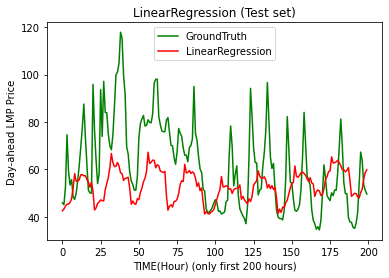

In [301]:
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')

plt.plot(prediction_LinearRegression[:200], color ='red', label='LinearRegression')


plt.title("LinearRegression (Test set)")
plt.xlabel("TIME(Hour) (only first 200 hours)")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

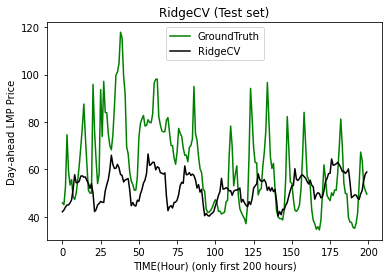

In [302]:
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='black', label='RidgeCV')

plt.title("RidgeCV (Test set)")
plt.xlabel("TIME(Hour) (only first 200 hours)")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

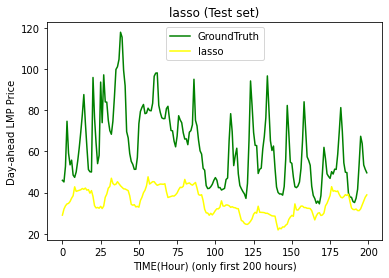

In [303]:
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_lasso[:200], color ='yellow', label='lasso')

plt.title("lasso (Test set)")
plt.xlabel("TIME(Hour) (only first 200 hours)")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

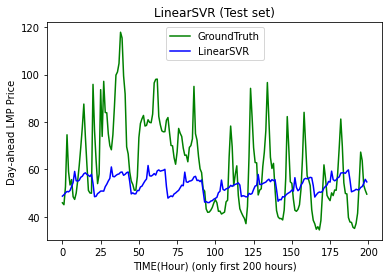

In [304]:
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_LinearSVR[:200], color ='blue', label='LinearSVR')

plt.title("LinearSVR (Test set)")
plt.xlabel("TIME(Hour) (only first 200 hours)")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

# Part B Impact of different size of features

Following will explor the impact from the number of features.
1. weather features
2. grouping time sections 

In [305]:
MSE, RMSE, MAPE = [], [], []

In [306]:
#Temperature only model 
X = df['Temperature'].values.reshape(-1, 1)

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

6690
(4683, 1)
(2007, 1)
(4683,)
(2007,)


In [307]:
RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mean_squared_score = mean_squared_error(y_test, prediction_RidgeCV)
print(mean_squared_score)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(mape)

2124.1497433480354
0.5629125056211097


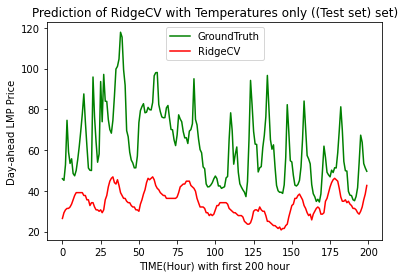

In [308]:
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 2)
(2007, 2)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.5789610400800334
mean_squared_error: 47.02063057557548


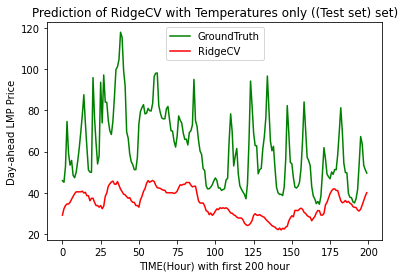

In [309]:
#Temperature only model 
X = df[['Temperature', 'Dew Point']]

before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 3)
(2007, 3)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.5781431366364137
mean_squared_error: 46.846549235621104


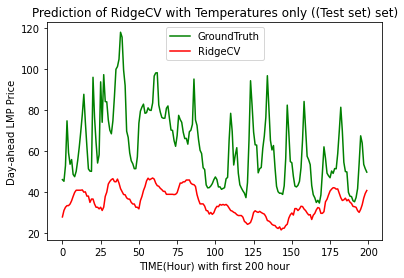

In [310]:
#Temperature only model 
X = df[['Temperature', 'Dew Point', 'Humidity']]
# Humidity  Pressure  Day-of-Week  Condition_cat
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 4)
(2007, 4)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.5778649260326454
mean_squared_error: 46.75387550288426


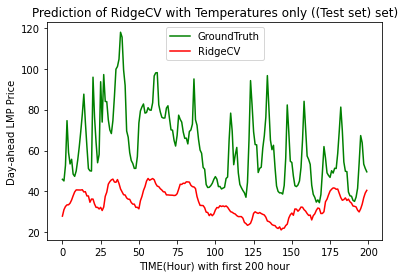

In [311]:
#Temperature only model 
X = df[['Temperature', 'Dew Point', 'Humidity', 'Pressure']]
# Humidity  Pressure  Day-of-Week  Condition_cat
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)
mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 5)
(2007, 5)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.5756901291372422
mean_squared_error: 46.63023034539884


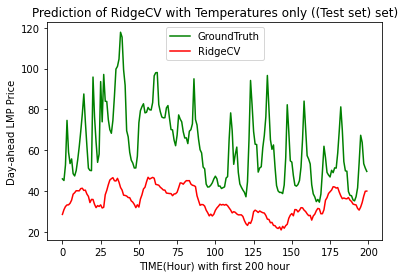

In [312]:
#Temperature only model 
X = df[['Temperature', 'Dew Point', 'Humidity', 'Pressure', 'Condition_cat']]
# Humidity  Pressure  Day-of-Week  Condition_cat
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)

mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 6)
(2007, 6)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.5764554843698512
mean_squared_error: 46.521914406461626


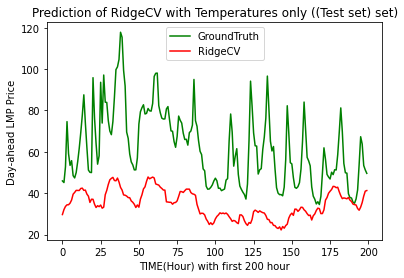

In [313]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)

mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 7)
(2007, 7)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.31661780135782436
mean_squared_error: 29.259372776799463


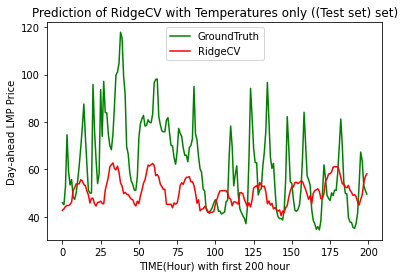

In [314]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)

mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 8)
(2007, 8)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.3195856430108152
mean_squared_error: 28.265164807894763


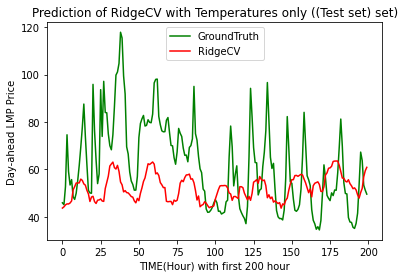

In [315]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)

mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 9)
(2007, 9)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.3143010617620056
mean_squared_error: 27.55922040862124


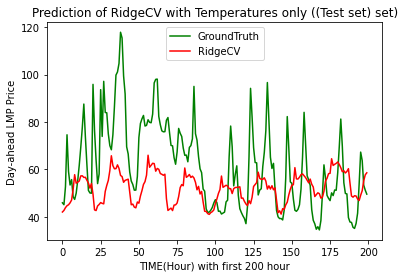

In [316]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day', '24Hours']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)

mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 10)
(2007, 10)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.3140960631825956
mean_squared_error: 27.547031726103715


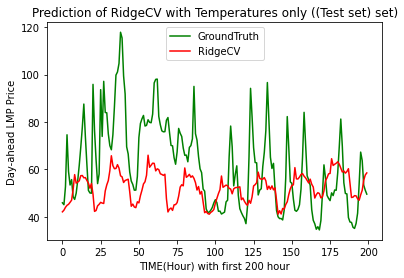

In [317]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day', '24Hours', 'Time_8']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)

mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 11)
(2007, 11)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.3141596749978859
mean_squared_error: 27.55176556272387


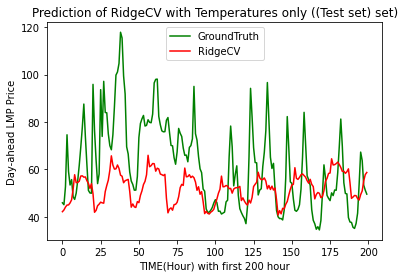

In [318]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day', '24Hours', 'Time_8', 'Time_6']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)

mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

6690
(4683, 12)
(2007, 12)
(4683,)
(2007,)
mean_squared_error: 2124.1497433480354
mean_absolute_percentage_error: 0.31350485566441616
mean_squared_error: 27.615135962380506


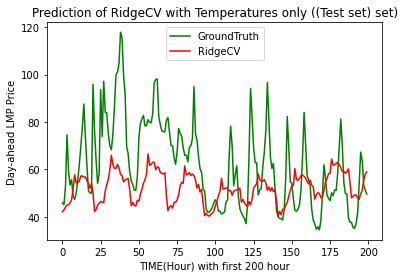

In [319]:
#Impact of time models
#WeekDay-WeekEnd  Date_month  Date_day  24Hours  Time_8  Time_6 Day-of-Week
X = df[['Temperature', 'Dew Point', 'Humidity',  'Pressure', 'Condition_cat', 'WeekDay-WeekEnd', 'Date_month', 'Date_day', '24Hours', 'Time_8', 'Time_6', 'Day-of-Week']]
before_war = int(X.shape[0]*0.75)
print(before_war)
X_train = X[:int(before_war*0.7)]
X_test = X[int(before_war*0.7):before_war]
y_train = Y[:int(before_war*0.7)]
y_test = Y[int(before_war*0.7):before_war]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RidgeCV_model = RidgeCV(alphas = alphavec, cv=5).fit(X_train, y_train)
prediction_RidgeCV = RidgeCV_model.predict(X_test)

mse = mean_squared_error(y_test, prediction_RidgeCV)
print(f'mean_squared_error: {mean_squared_score}')
MSE.append(mse)
mape = mean_absolute_percentage_error(y_test, prediction_RidgeCV)
print(f'mean_absolute_percentage_error: {mape}')
MAPE.append(mape)
rmse = mean_squared_error(y_test, prediction_RidgeCV, squared=False)
print(f'mean_squared_error: {rmse}')
RMSE.append(rmse)
#evaluate(RidgeCV_model)
groundTruth = y_test.values.reshape(-1, 1)
plt.plot(groundTruth[:200], color = "green", label='GroundTruth')
plt.plot(prediction_RidgeCV[:200], color ='red', label='RidgeCV')
#plt.plot(scaler.inverse_transform(prediction_RidgeCV[:200]), color='blue')
plt.title("Prediction of RidgeCV with Temperatures only ((Test set) set)")
plt.xlabel("TIME(Hour) with first 200 hour")
plt.ylabel("Day-ahead LMP Price")
leg = plt.legend(loc='upper center')
plt.show()

In [320]:
df['Day-Ahead-LMP-price'].describe()

count    8921.000000
mean       59.960829
std        43.882031
min        10.850000
25%        32.550000
50%        44.770000
75%        65.740000
max       274.750000
Name: Day-Ahead-LMP-price, dtype: float64

In [321]:
print(len(MSE))
print(len(RMSE))
print(len(MAPE))

11
11
11


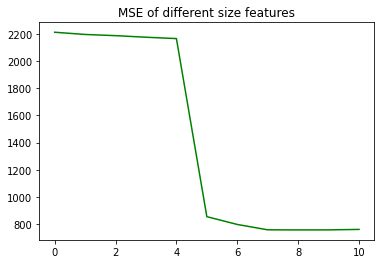

In [322]:
plt.title("MSE of different size features")
plt.plot(MSE, color = "green")

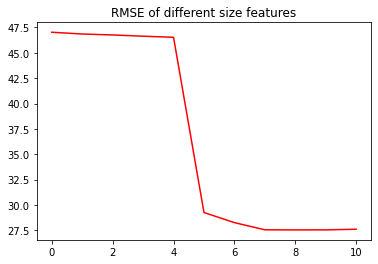

In [323]:
plt.title("RMSE of different size features")
plt.plot(RMSE, color = "red")

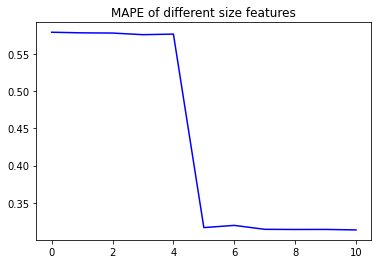

In [324]:
plt.title("MAPE of different size features")
plt.plot(MAPE, color = "blue")